In [1]:
%load_ext rpy2.ipython

##LoF

In [2]:
%%R
library("data.table")
d.cc.lof <- fread("/usr/data/Documents/SaveDataFromServer/CombinedDataThreeDiseases/results.combined3Diseases.dn.lof.genesetFMRP.txt")


cLLK <- dim(d.cc.lof)[2]
d.cc.lof[[cLLK]] <- -d.cc.lof[[cLLK]]
#full.cc.LoF.rho[, cLLK] <- -full.cc.LoF.rho[, cLLK]
getwd()

data.table 1.9.4  For help type: ?data.table
*** NB: by=.EACHI is now explicit. See README to restore previous behaviour.
[1] "/usr/data/Documents/GitHub/TestR/HBproject/extTADA"


In [3]:
%%R
print(dim(d.cc.lof))
head(d.cc.lof)

[1] 25900     4
      V1 V2  V3        V4
1: 0.035  2 0.2 -434.4205
2: 0.035  2 0.4 -445.9157
3: 0.035  2 0.6 -452.3755
4: 0.035  2 0.8 -456.5963
5: 0.035  2 1.0 -459.6012
6: 0.035  2 1.2 -461.8632


In [4]:
%%R
library("ggplot2")

#d.cc.lof[plot(V1, -V8, xlab = 'pi')]

#p1 <- ggplot(d.cc.lof,aes(x= V1, y = -V8, group = V2)) + geom_point()
#print(p1)

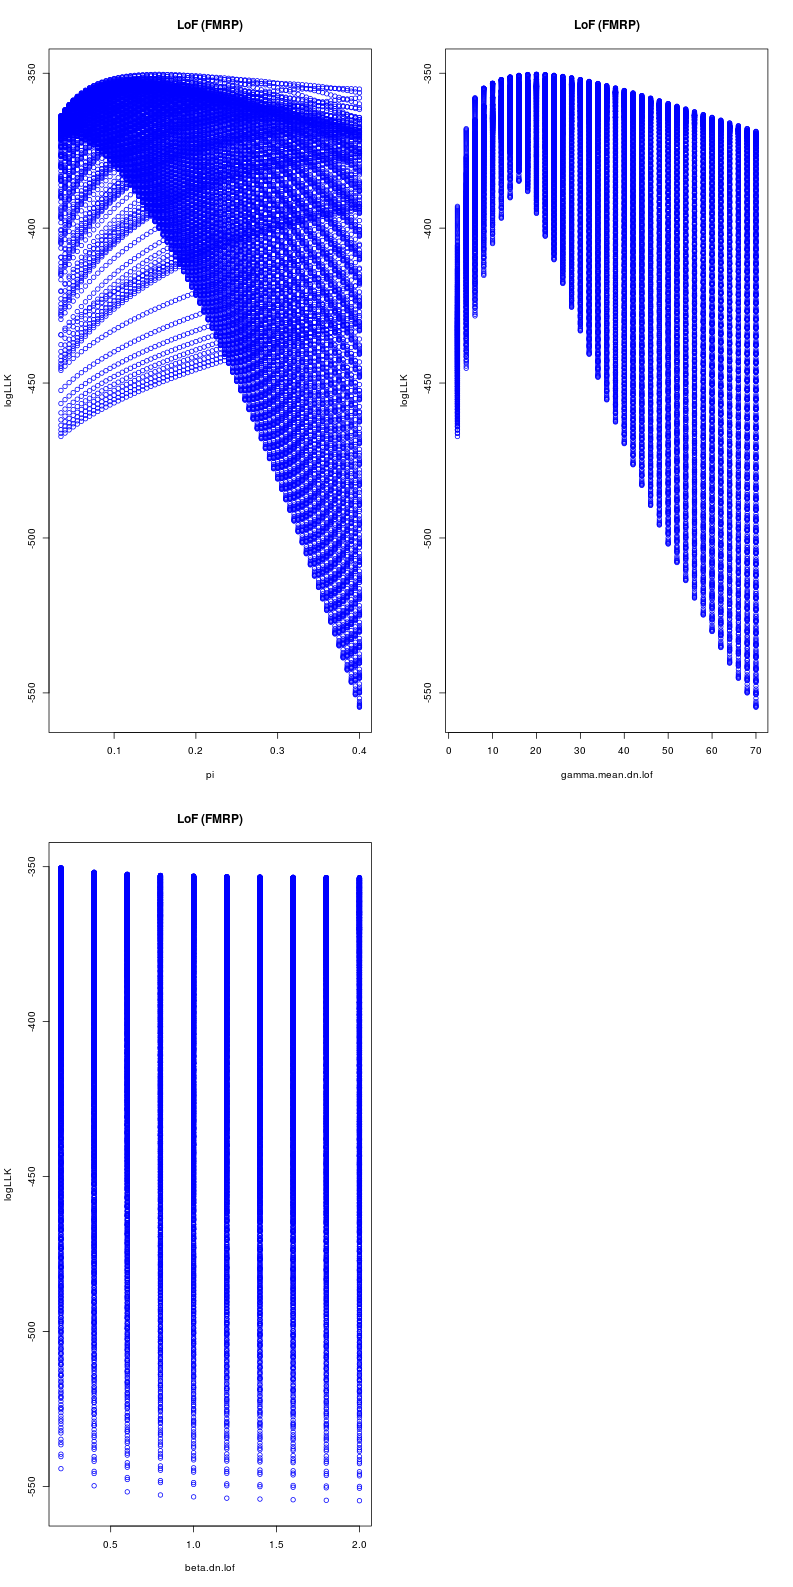

In [5]:
%%R -w 28 -h 56 -u cm
nameCol <- c("pi", "gamma.mean.dn.lof", "beta.dn.lof", "rho1.lof")

par(mfrow = c(2, 2))
for (ii in 1:(cLLK -1)){
    
    plot(d.cc.lof[[ii]], d.cc.lof[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK',
        col = 'blue', main = "LoF (FMRP)")
}

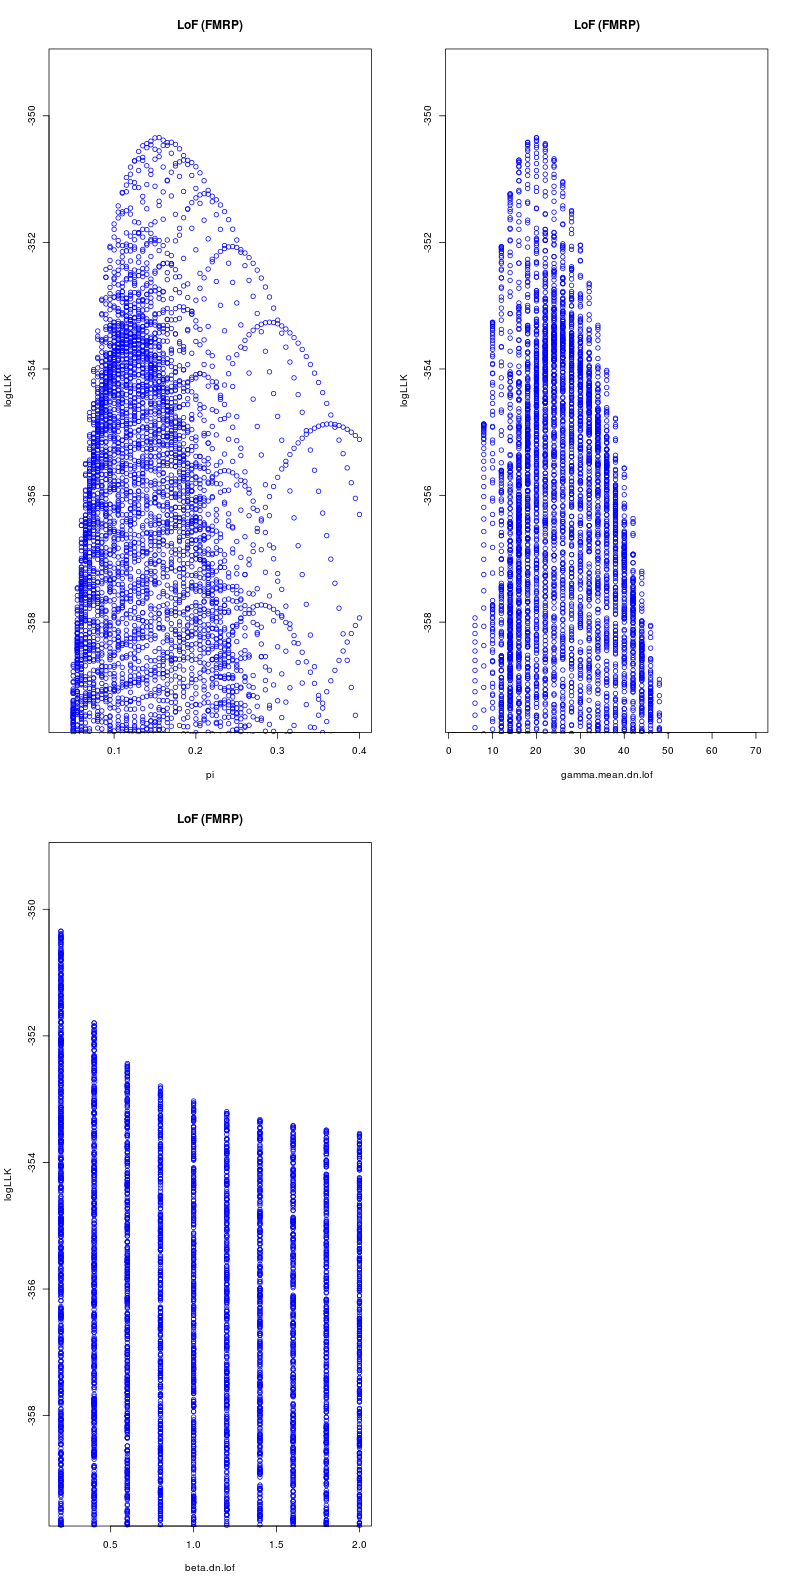

In [6]:
%%R -w 28 -h 56 -u cm
uLimit <- max(d.cc.lof[[cLLK]]) + 1
lLimit <- uLimit - 10
d.cc.lof.1 <- d.cc.lof[V4>=lLimit]
par(mfrow = c(2, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.lof[[ii]], d.cc.lof[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', 
         ylim = c(lLimit, uLimit), col = 'blue', main = 'LoF (FMRP)')
}

In [105]:
%%R
d.cc.lof.1[order(V4)]

        V1 V2  V3        V4
  1: 0.130 28 1.8 -354.3438
  2: 0.095 32 1.6 -354.3418
  3: 0.105 22 1.0 -354.3365
  4: 0.140 26 2.0 -354.3360
  5: 0.175 20 1.0 -354.3341
 ---                       
987: 0.170 18 0.2 -350.4174
988: 0.145 20 0.2 -350.4013
989: 0.160 20 0.2 -350.3839
990: 0.150 20 0.2 -350.3491
991: 0.155 20 0.2 -350.3440


###Set limit for the proportion of protective variants and the frequency of variants

In [106]:
%%R
d.cc.lof.1 <- d.cc.lof[pgamma(1, V2*V3, rate = V3) < 10^-16]

#d.cc.lof.1 <- d.cc.lof.1[V4/V5 <= V6/V7]

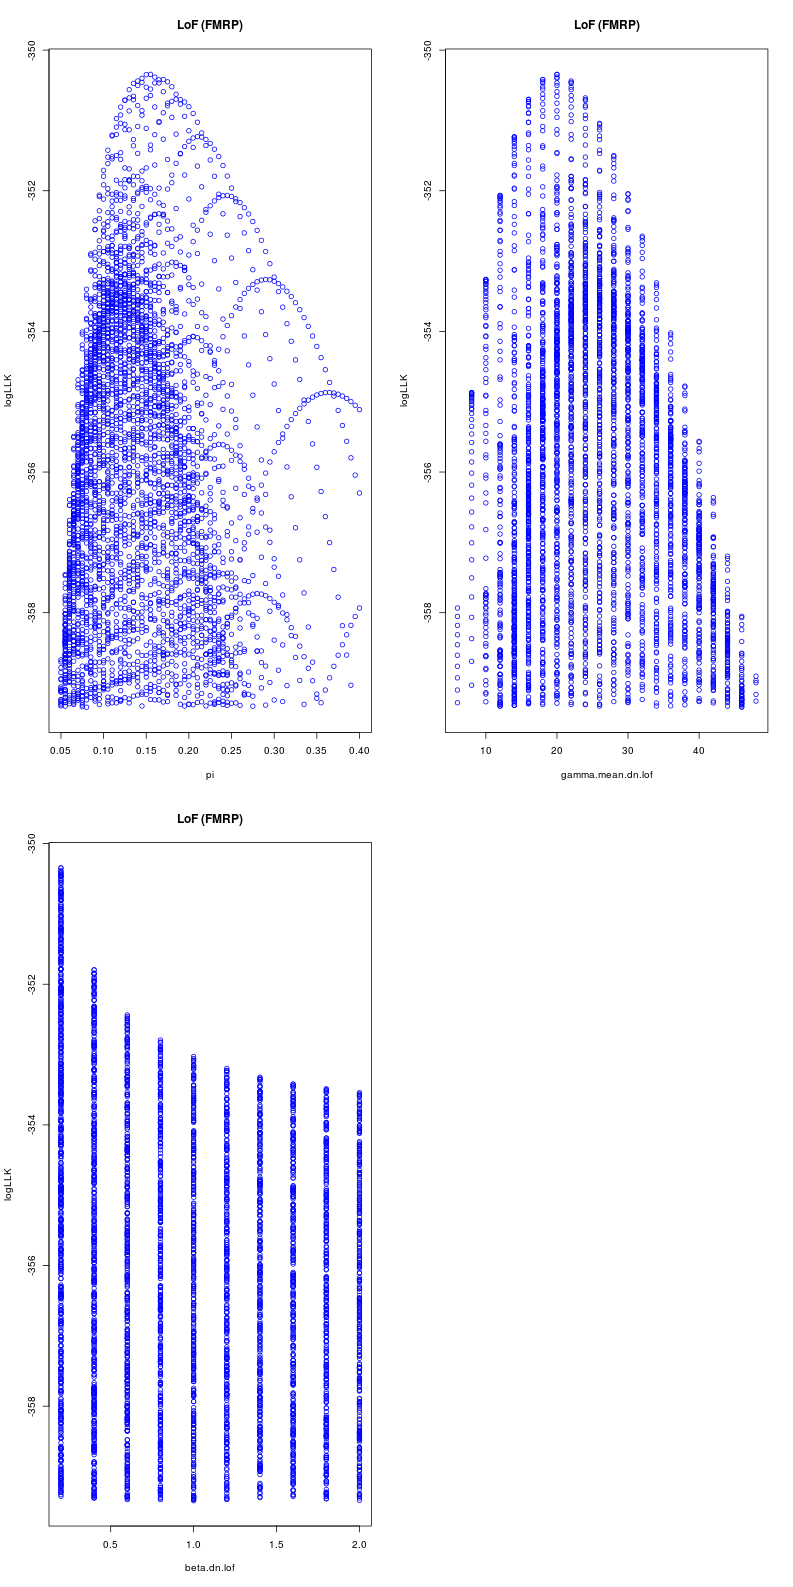

In [7]:
%%R -w 28 -h 56 -u cm

par(mfrow = c(2, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.lof.1[[ii]], d.cc.lof.1[[cLLK]], xlab = nameCol[ii], 
         ylab = 'logLLK', col = 'blue', main = 'LoF (FMRP)')
}

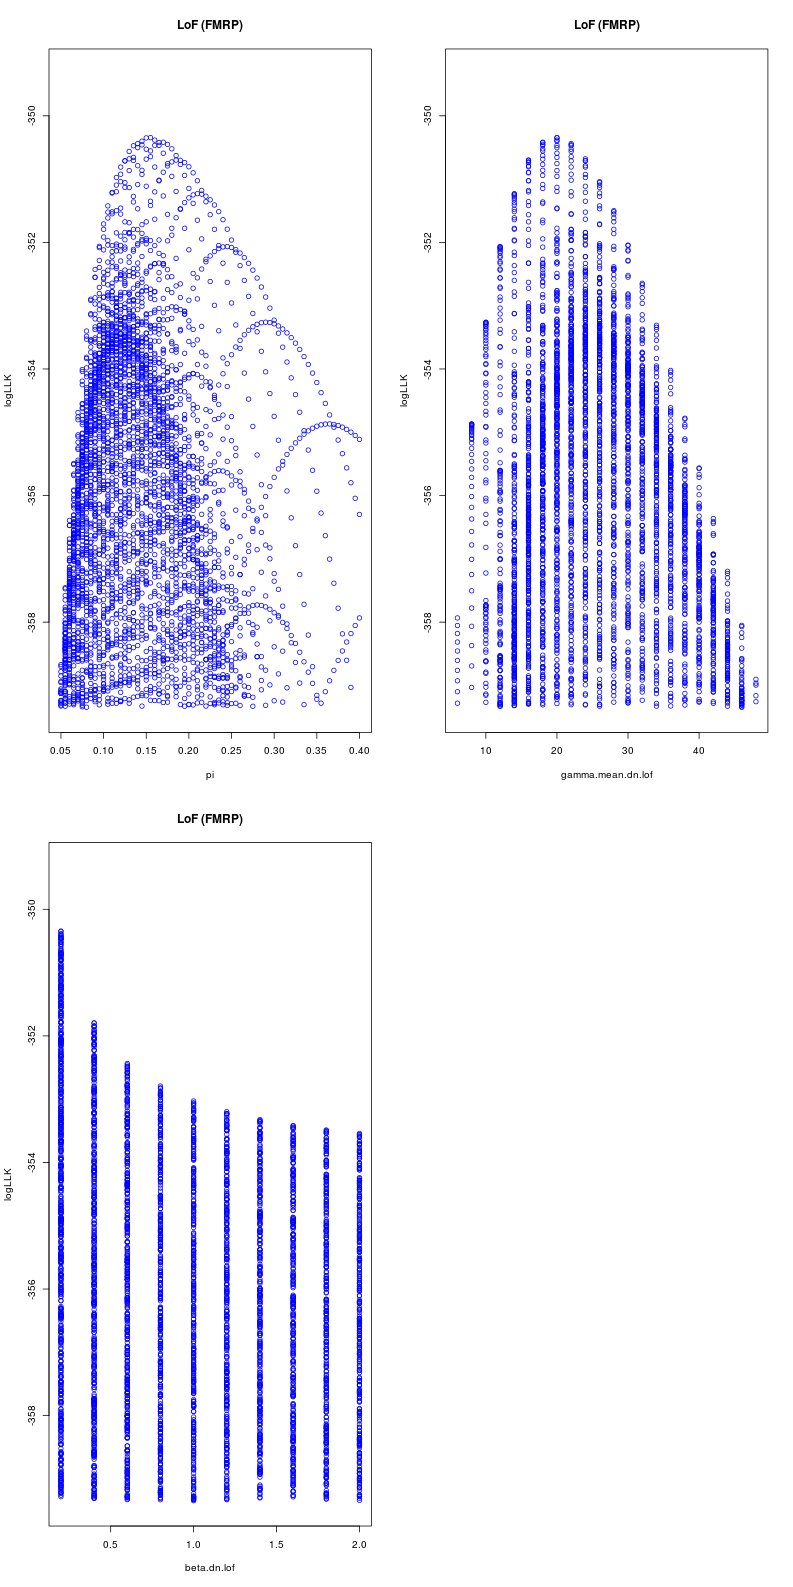

In [8]:
%%R -w 28 -h 56 -u cm
uLimit <- max(d.cc.lof.1[[cLLK]]) + 1
lLimit <- uLimit - 10
d.cc.lof.1 <- d.cc.lof.1[V4>=lLimit]
par(mfrow = c(2, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.lof.1[[ii]], d.cc.lof.1[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', 
         ylim = c(lLimit, uLimit), col = 'blue', main = 'LoF (FMRP)')
}

       V1 V2  V3        V4
 1: 0.115 26 0.6 -352.5735
 2: 0.120 26 0.6 -352.5764
 3: 0.110 26 0.6 -352.6446
 4: 0.125 26 0.6 -352.6491
 5: 0.130 26 0.6 -352.7876
 6: 0.125 24 0.8 -352.7926
 7: 0.105 26 0.6 -352.7949
 8: 0.130 24 0.8 -352.8216
 9: 0.120 24 0.8 -352.8291
10: 0.110 28 0.6 -352.8435
11: 0.115 26 0.8 -352.8807
12: 0.105 28 0.6 -352.8821
13: 0.115 28 0.6 -352.8844
14: 0.120 26 0.8 -352.8916
15: 0.135 22 0.8 -352.9017
16: 0.135 24 0.8 -352.9125
17: 0.140 22 0.8 -352.9282
18: 0.130 22 0.8 -352.9331
19: 0.115 24 0.8 -352.9349
20: 0.110 26 0.8 -352.9442
21: 0.125 26 0.8 -352.9725
22: 0.135 26 0.6 -352.9884
23: 0.120 28 0.6 -352.9999
24: 0.100 28 0.6 -353.0059
25: 0.145 22 0.8 -353.0097
26: 0.125 22 0.8 -353.0257
27: 0.125 24 1.0 -353.0289
28: 0.100 26 0.6 -353.0299
29: 0.120 24 1.0 -353.0607
30: 0.140 24 0.8 -353.0621
31: 0.130 24 1.0 -353.0626
32: 0.115 26 1.0 -353.0842
33: 0.105 26 0.8 -353.0870
34: 0.120 26 1.0 -353.1000
35: 0.110 24 0.8 -353.1146
36: 0.110 28 0.8 -353.1173
3

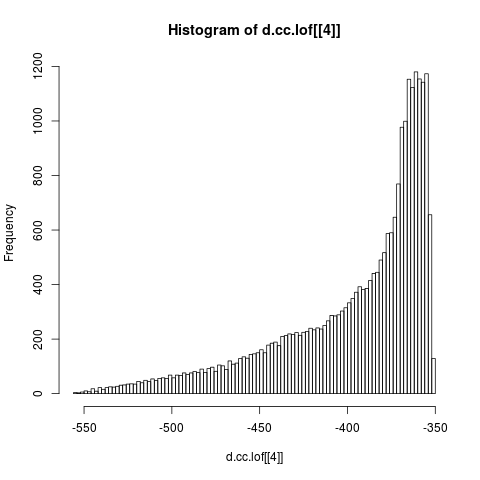

In [112]:
%%R
hist(d.cc.lof[[4]], 100)
head(d.cc.lof.1[order(-V4)], 40)


In [85]:
#!gist -p Test_combined_geneset_dn_FMRP.ipynb

In [148]:
!gist -u https://gist.github.com/0c9b03f29884f18bb6d3 Test_combined_geneset_dn_FMRP.ipynb

https://gist.github.com/0c9b03f29884f18bb6d3


##MIS3

In [9]:
%%R
library("data.table")

d.cc.mis3 <- fread("/usr/data/Documents/SaveDataFromServer/CombinedDataThreeDiseases/results.combined3Diseases.dn.mis3.genesetFMRP.txt")



cLLK1 <- dim(d.cc.mis3)[2]
d.cc.mis3 <- d.cc.mis3[V4 != "NA"]
d.cc.mis3[[cLLK1]] <- -d.cc.mis3[[cLLK1]]
#full.cc.LoF.rho[, cLLK] <- -full.cc.LoF.rho[, cLLK]
getwd()

[1] "/usr/data/Documents/GitHub/TestR/HBproject/extTADA"


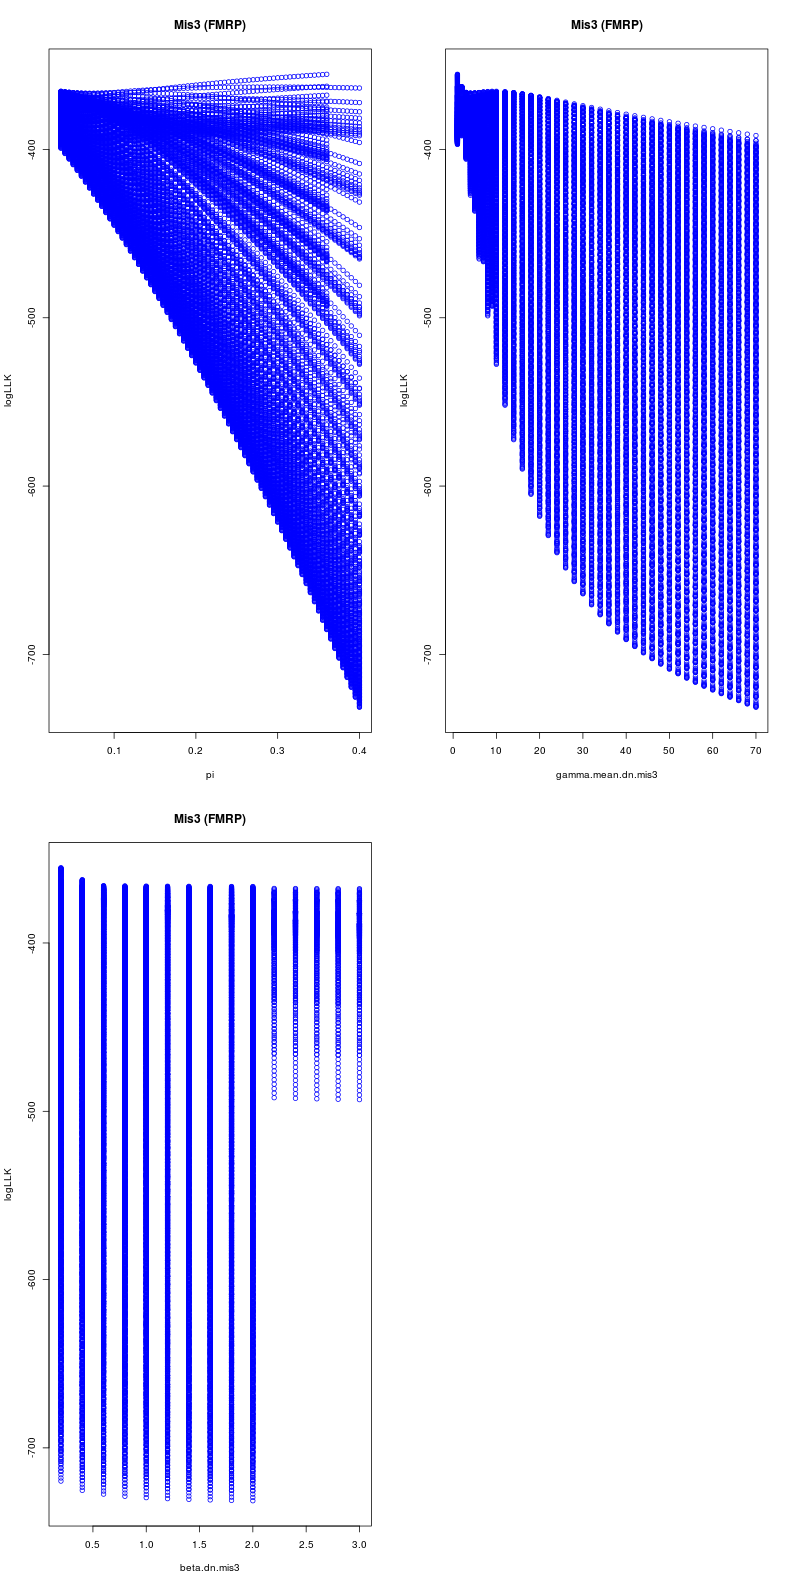

In [10]:
%%R -w 28 -h 56 -u cm
nameCol <- c("pi", "gamma.mean.dn.mis3", "beta.dn.mis3")

par(mfrow = c(2, 2))
for (ii in 1:(cLLK1 -1)){
    
    plot(d.cc.mis3[[ii]], d.cc.mis3[[cLLK1]], xlab = nameCol[ii], 
         ylab = 'logLLK', col = 'blue', main = 'Mis3 (FMRP)')
}

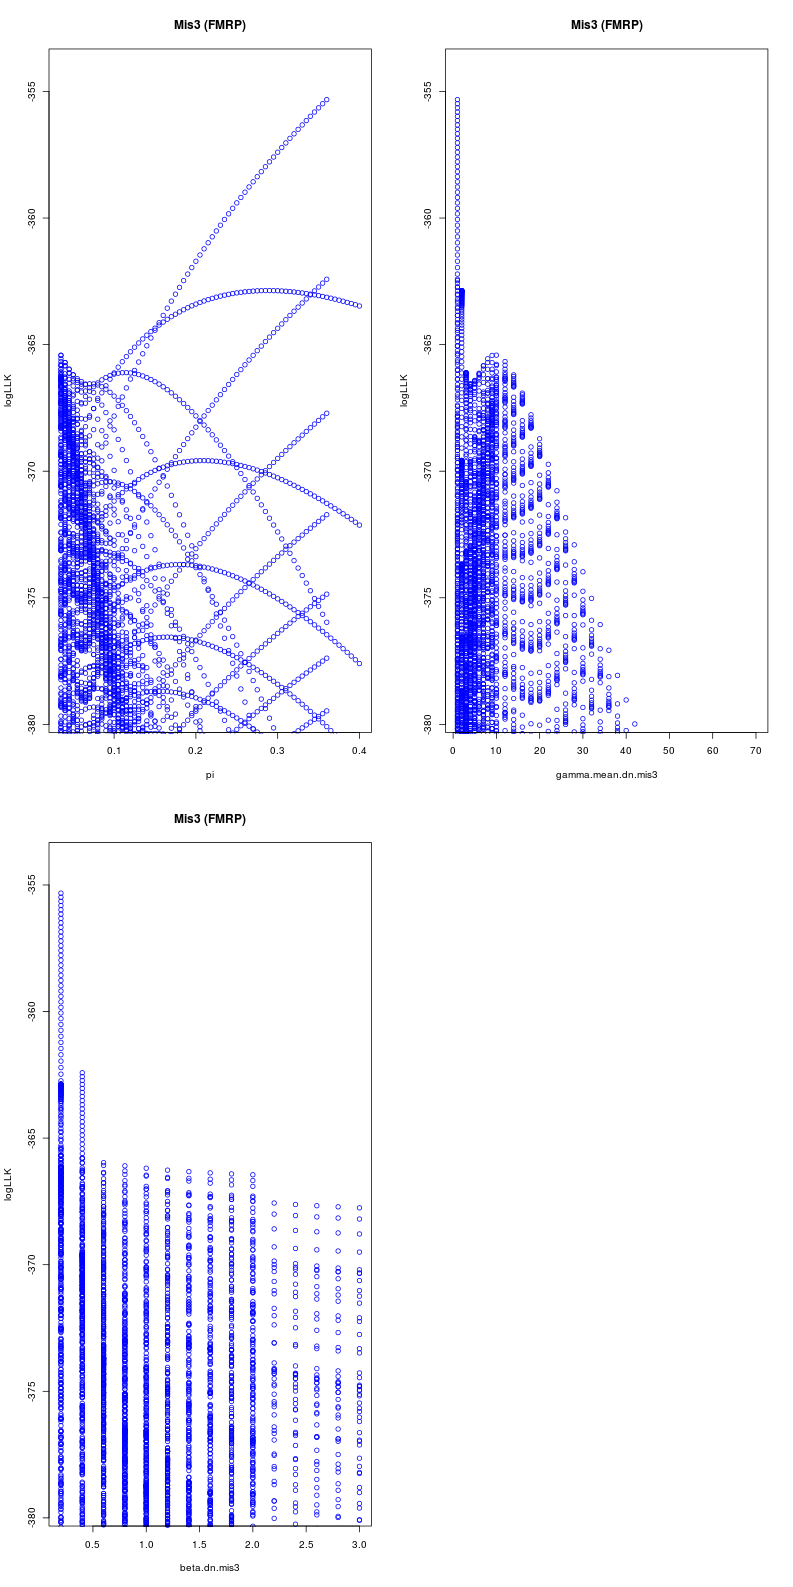

In [11]:
%%R -w 28 -h 56 -u cm
uLimit <- max(d.cc.mis3[[cLLK1]]) + 1
lLimit <- uLimit - 25

par(mfrow = c(2, 2))
for (ii in 1:(cLLK1 -1)){
    plot(d.cc.mis3[[ii]], d.cc.mis3[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', 
         ylim = c(lLimit, uLimit), col = 'blue', main = 'Mis3 (FMRP)')
}

##Set limit

In [14]:
%%R
d.cc.mis3.1 <- d.cc.mis3[pgamma(1, V2*V3, rate = V3) < 0.006]

#d.cc.mis3.1 <- d.cc.mis3.1[V4/V5 <= V6/V7]

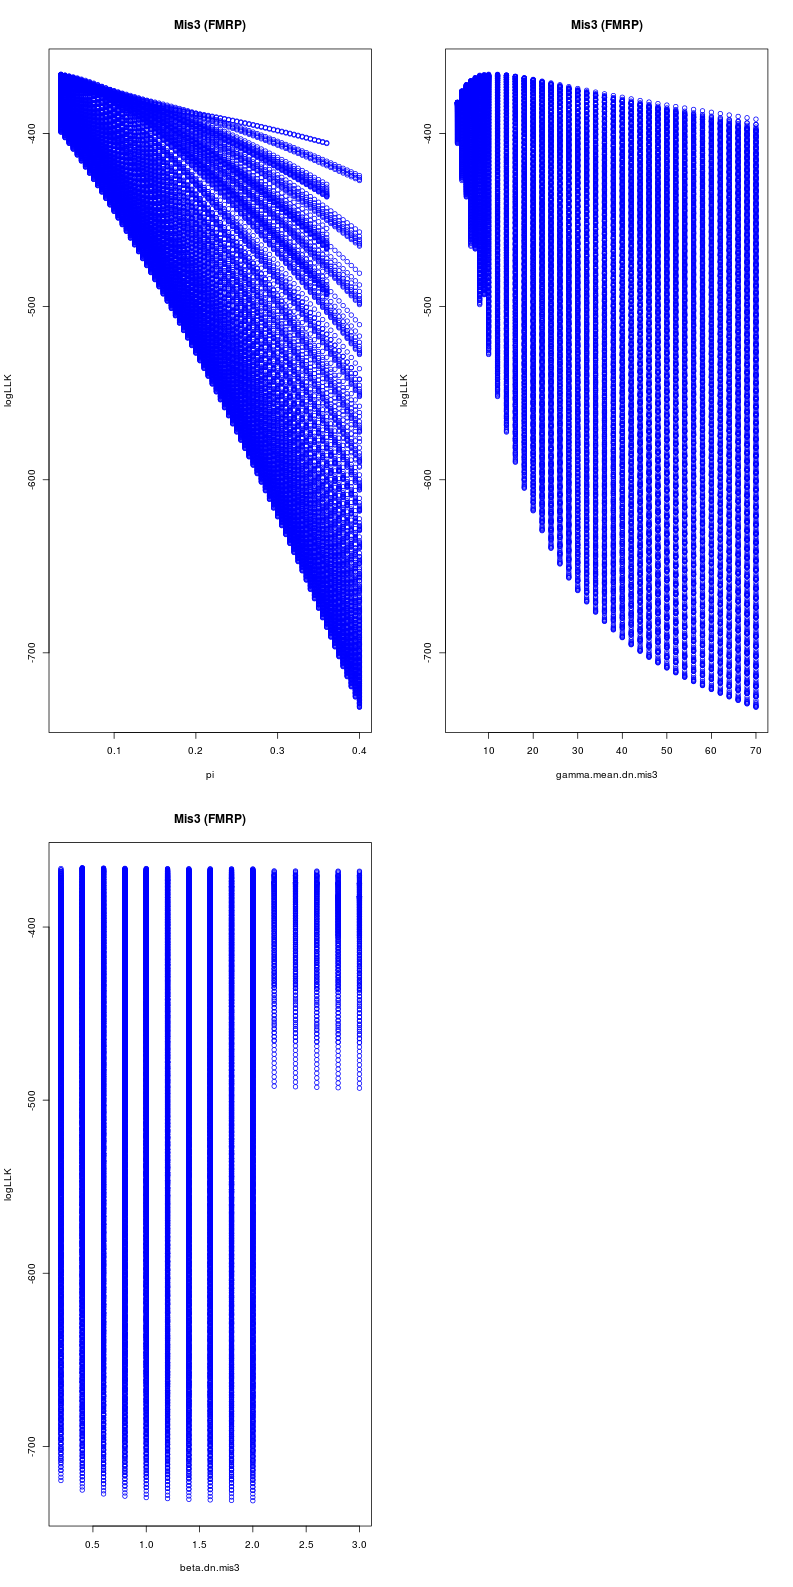

In [15]:
%%R -w 28 -h 56 -u cm


par(mfrow = c(2, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.mis3.1[[ii]], d.cc.mis3.1[[cLLK]], xlab = nameCol[ii], 
         ylab = 'logLLK', col = 'blue', main = 'Mis3 (FMRP)')
}

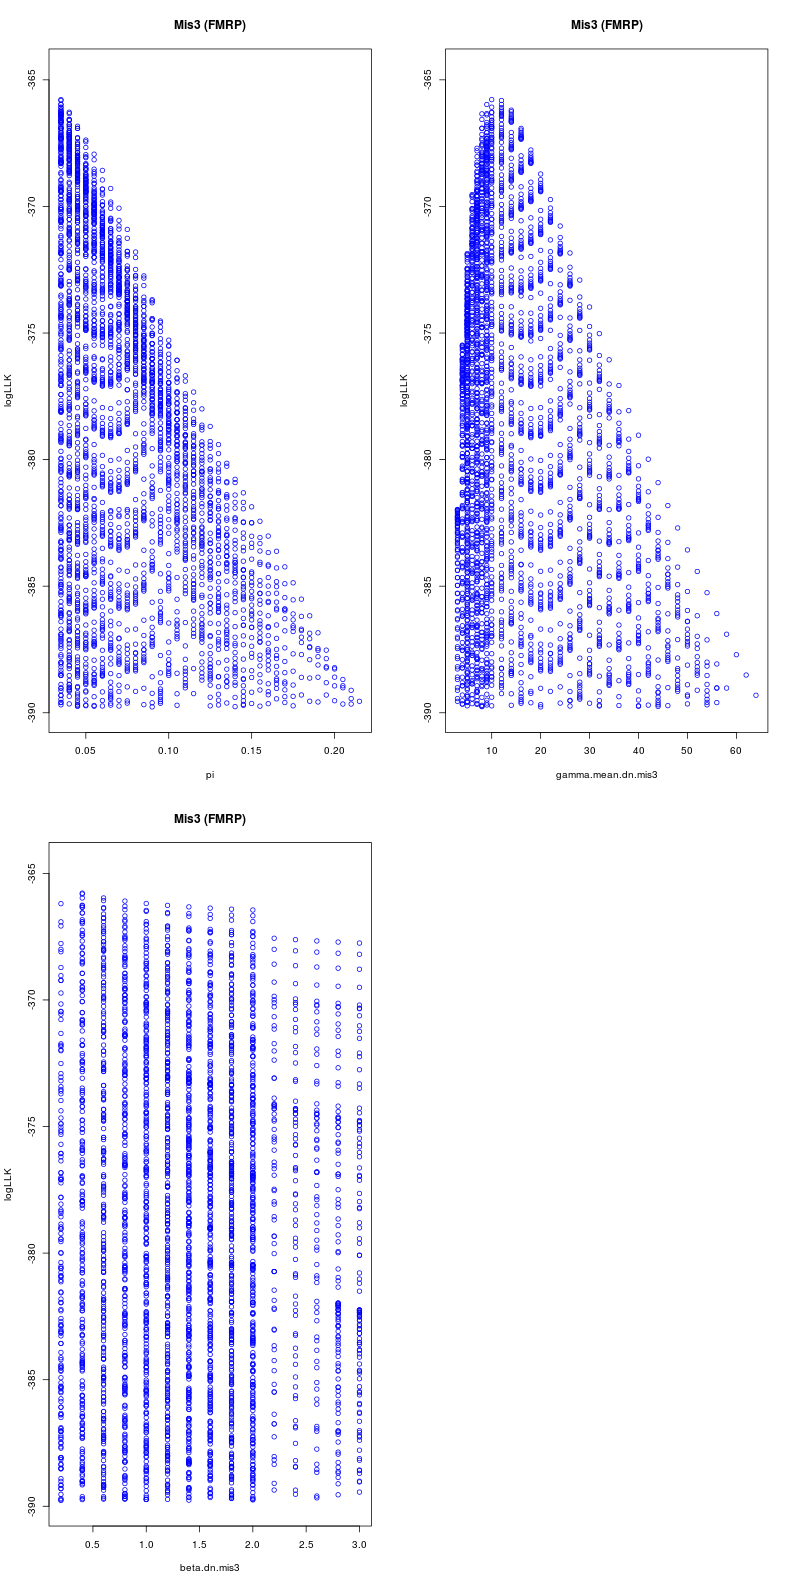

In [16]:
%%R -w 28 -h 56 -u cm
uLimit <- max(d.cc.mis3.1[[cLLK]]) + 1
lLimit <- uLimit - 25

d.cc.mis3.1 <- d.cc.mis3.1[V4 >= lLimit]
par(mfrow = c(2, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.mis3.1[[ii]], d.cc.mis3.1[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', 
         ylim = c(lLimit, uLimit), col = 'blue', main = 'Mis3 (FMRP)')
}

       V1 V2  V3        V4
 1: 0.035 10 0.4 -365.7800
 2: 0.035 12 0.4 -365.8144
 3: 0.035 12 0.6 -365.9706
 4: 0.035  9 0.4 -365.9715
 5: 0.035 10 0.6 -366.0770
 6: 0.035 12 0.8 -366.0935
 7: 0.035 12 1.0 -366.1885
 8: 0.035 14 0.2 -366.1956
 9: 0.035 14 0.4 -366.2578
10: 0.035 12 1.2 -366.2632
11: 0.040 10 0.4 -366.2776
12: 0.035 10 0.8 -366.2969
13: 0.035 12 1.4 -366.3231
14: 0.040  9 0.4 -366.3329
15: 0.035  8 0.4 -366.3422
16: 0.035 14 0.6 -366.3546
17: 0.035 12 1.6 -366.3720
18: 0.035  9 0.6 -366.3831
19: 0.035 12 1.8 -366.4127
20: 0.035 14 0.8 -366.4351
21: 0.035 12 2.0 -366.4471
22: 0.035 10 1.0 -366.4627
23: 0.035 14 1.0 -366.4986
24: 0.035 14 1.2 -366.5491
25: 0.040  8 0.4 -366.5624
26: 0.040 12 0.4 -366.5671
27: 0.035 14 1.4 -366.5897
28: 0.035 10 1.2 -366.5913
29: 0.040 10 0.6 -366.6064
30: 0.035 14 1.6 -366.6231
31: 0.035 14 1.8 -366.6508
32: 0.035 14 2.0 -366.6743
33: 0.035  9 0.8 -366.6820
34: 0.035 10 1.4 -366.6937
35: 0.040 12 0.6 -366.7593
36: 0.040  9 0.6 -366.7741
3

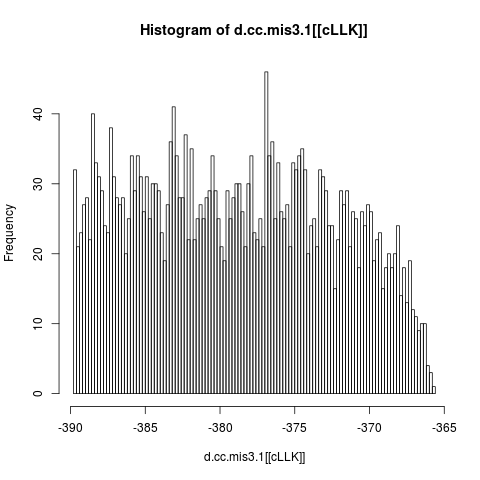

In [17]:
%%R
hist(d.cc.mis3.1[[cLLK]], 100)
head(d.cc.mis3.1[order(-V4)], 40)

###Beta = 1

In [158]:
%%R
d.cc.mis3.2 <- d.cc.mis3[(V3 < 1.3) & (V3>0.8)]

#d.cc.mis3.1 <- d.cc.mis3.1[V4/V5 <= V6/V7]

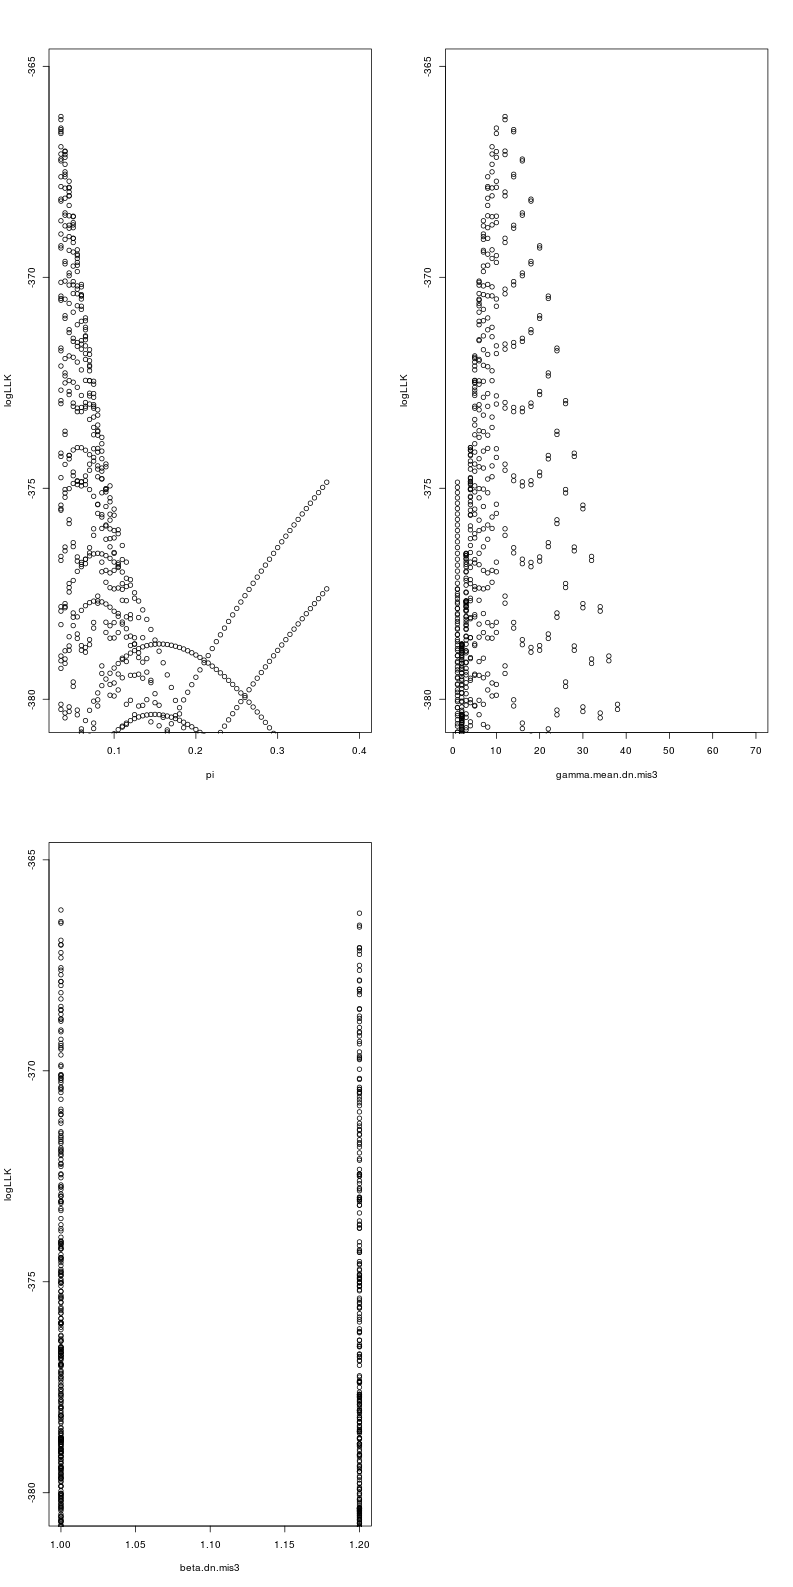

In [159]:
%%R -w 28 -h 56 -u cm
uLimit <- max(d.cc.mis3.2[[cLLK]]) + 1
lLimit <- uLimit - 15

par(mfrow = c(2, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.mis3.2[[ii]], d.cc.mis3.2[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', ylim = c(lLimit, uLimit))
}

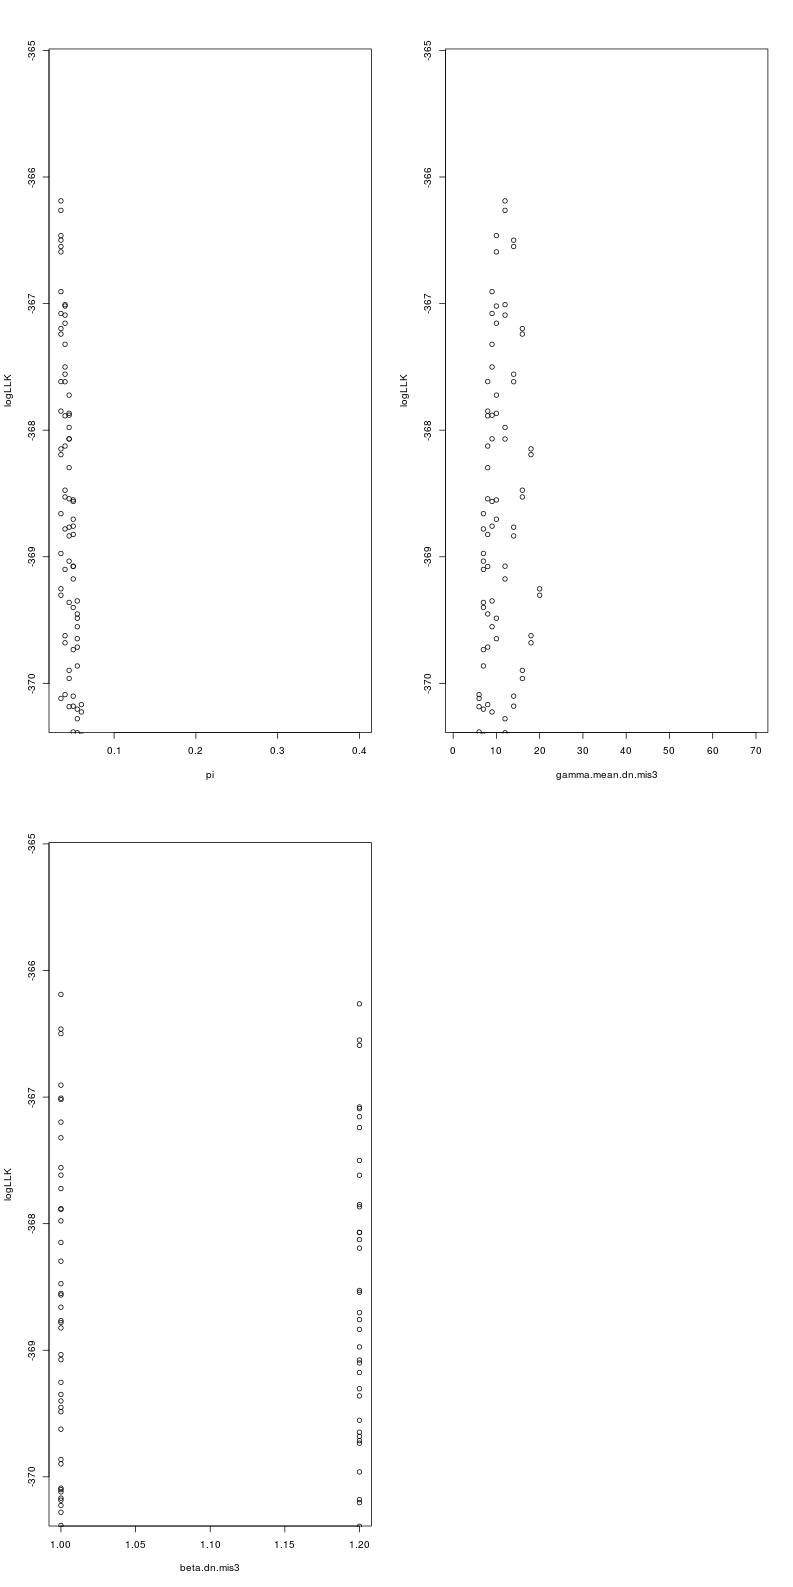

In [160]:
%%R -w 28 -h 56 -u cm
uLimit <- max(d.cc.mis3.2[[cLLK]]) + 1
lLimit <- uLimit - 5

par(mfrow = c(2, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.mis3.2[[ii]], d.cc.mis3.2[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', ylim = c(lLimit, uLimit))
}